# 1. Titanic

## 1-1. 문제 정의 및 가설 수립
* 나이가 어릴수록 생존률이 높을 것이다.
* 여자의 생존률이 남자보다 높을 것이다.
* 높은 객실등급에 탄 사람들이 낮은 등급보다 생존률이 높을 것이다.
* ..

## 1-2. 데이터 가져오기
* kaggle 데이터 (https://www.kaggle.com/datasets)
* 공공데이터 포털 (https://www.data.go.kr)
* 서울열린데이터광장 (https://data.seoul.go.kr)
* 통계청 (https://kosis.kr)
* 기상청 (https://data.kma.go.kr) 등

In [1]:
#!kaggle competitions download -c titanic

In [2]:
#!mkdir titanic_data

In [3]:
#!tar -xvf titanic.zip -C titanic_data

## 1-3. 데이터 로드하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('titanic_data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 한글 컬럼명으로 바꾸기
# 생존여부 (0= 사망, 1=생존)
# 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)
df.columns = ['id', '생존여부', '객실등급', '이름', '성별', '나이', '형제배우자수', '부모아이수', '티켓번호', '요금', '수하물번호', '선착장']
df.head()

,id,생존여부,객실등급,이름,성별,나이,형제배우자수,부모아이수,티켓번호,요금,수하물번호,선착장
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1-4. 데이터 살펴보기

In [7]:
# 행 갯수, 열 갯수 보기
df.shape

(891, 12)

In [8]:
# 컬럼 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      891 non-null    int64  
 1   생존여부    891 non-null    int64  
 2   객실등급    891 non-null    int64  
 3   이름      891 non-null    object 
 4   성별      891 non-null    object 
 5   나이      714 non-null    float64
 6   형제배우자수  891 non-null    int64  
 7   부모아이수   891 non-null    int64  
 8   티켓번호    891 non-null    object 
 9   요금      891 non-null    float64
 10  수하물번호   204 non-null    object 
 11  선착장     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 요약 통계값 보기
df.describe()

,id,생존여부,객실등급,나이,형제배우자수,부모아이수,요금
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 결측값 보기
df.isnull().sum()

id          0
생존여부        0
객실등급        0
이름          0
성별          0
나이        177
형제배우자수      0
부모아이수       0
티켓번호        0
요금          0
수하물번호     687
선착장         2
dtype: int64

In [11]:
# 객실등급
df['객실등급'].value_counts()

3    491
1    216
2    184
Name: 객실등급, dtype: int64

In [12]:
# 선착장
df['선착장'].value_counts()

S    644
C    168
Q     77
Name: 선착장, dtype: int64

In [13]:
# 불필요한 컬럼 삭제하기
# id, 이름, 티켓번호, 수하물번호
df.drop(['id', '이름', '티켓번호', '수하물번호'], axis=1, inplace=True)
df.head()

,생존여부,객실등급,성별,나이,형제배우자수,부모아이수,요금,선착장
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 1-5. EDA(탐색적 데이터분석)

### 1. 생존자수 보기

In [14]:
# 생존여부 보기
df['생존여부'].value_counts()

0    549
1    342
Name: 생존여부, dtype: int64

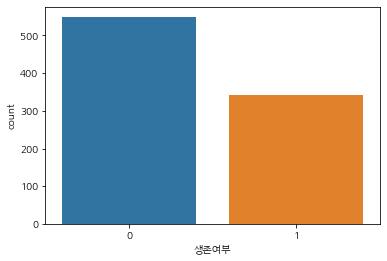

In [15]:
# Bar Plot으로 확인하기
sns.countplot(x='생존여부', data=df)
plt.show()

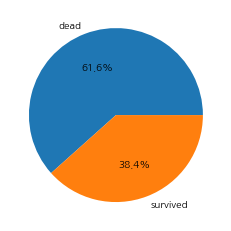

In [16]:
# Pie Chart로 확인하기
plt.pie(df.생존여부.value_counts(), labels=['dead', 'survived'], autopct='%.1f%%')
plt.show()

### 2. 나이별 데이터 분석

In [17]:
df['나이'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: 나이, dtype: float64

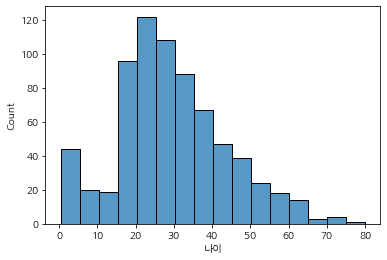

In [18]:
# 나이 분포도
sns.histplot(df['나이'], bins=16)
plt.show()

In [19]:
df.loc[df['나이'] <= 10, '생존여부'].count()

64

In [20]:
df.loc[df['나이'] <= 10, '생존여부'].sum()

38

In [21]:
survival_rate = []
for i in range(10, 91, 10):  # 0~8
    survival_rate.append(df.loc[(df['나이'] >= i-10) & (df['나이'] < i), '생존여부'].mean())
survival_rate

[0.6129032258064516,
 0.4019607843137255,
 0.35,
 0.437125748502994,
 0.38202247191011235,
 0.4166666666666667,
 0.3157894736842105,
 0.0,
 1.0]

C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\myha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


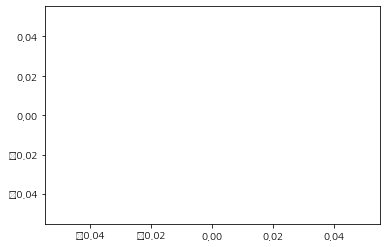

In [22]:
plt.plot(data=survival_rate)  # y만 주면, x는 0~N-1까지 잡힘
#sns.lineplot(data=survival_rate) 도 동일함
plt.show()

### 3. 성별에 따른 데이터 분석

In [23]:
# 성별 전체인원수
pd.DataFrame(df.groupby('성별')['생존여부'].count())

,생존여부
성별,
female,314
male,577


In [45]:
df.groupby('성별')['생존여부'].count().to_frame().reset_index()

,성별,생존여부
0,female,314
1,male,577


In [24]:
# 성별 생존인원수
pd.DataFrame(df.groupby(['성별'])['생존여부'].sum())

,생존여부
성별,
female,233
male,109


In [25]:
# 성별 생존인원수
pd.DataFrame(df.groupby(['성별', '생존여부'])['생존여부'].count())

생존여부
성별     생존여부      
female 0       81
       1      233
male   0      468
       1      109

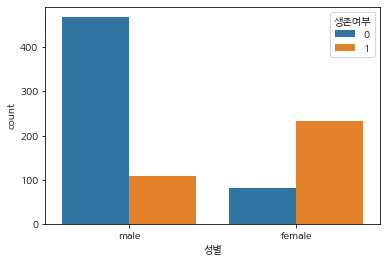

In [26]:
sns.countplot(x='성별', hue='생존여부', data=df)
plt.show()

In [27]:
# 성별 생존율
pd.DataFrame(df.groupby('성별')['생존여부'].mean())

,생존여부
성별,
female,0.742038
male,0.188908


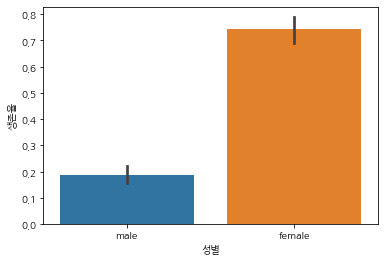

In [28]:
sns.barplot(x='성별', y='생존여부', data=df)
plt.ylabel('생존율')
plt.show()

### 4. 객실등급별 데이터 분석

In [29]:
# 객실등급별 전체인원수
pd.DataFrame(df.groupby('객실등급')['생존여부'].count())

,생존여부
객실등급,
1,216
2,184
3,491


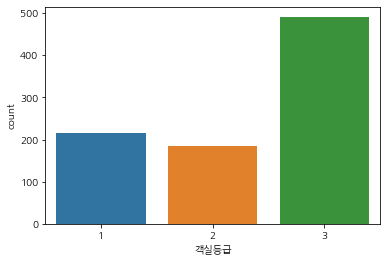

In [30]:
sns.countplot(x='객실등급', data=df)
plt.show()

In [31]:
# 객실등급별 생존인원수
pd.DataFrame(df.groupby(['객실등급'])['생존여부'].sum())

,생존여부
객실등급,
1,136
2,87
3,119


In [32]:
# 객실등급별 생존인원수
pd.DataFrame(df.groupby(['객실등급', '생존여부'])['생존여부'].count())

생존여부
객실등급 생존여부      
1    0       80
     1      136
2    0       97
     1       87
3    0      372
     1      119

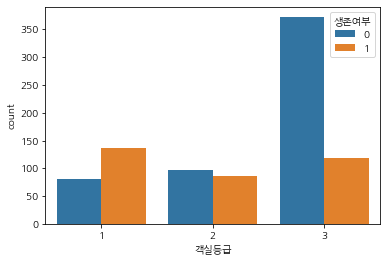

In [33]:
sns.countplot(x='객실등급', hue='생존여부', data=df)
plt.show()

In [34]:
# 객실등급별 생존율
pd.DataFrame(df.groupby('객실등급')['생존여부'].mean())

,생존여부
객실등급,
1,0.629630
2,0.472826
3,0.242363


In [35]:
pd.DataFrame(df.groupby('객실등급')['생존여부'].mean())

,생존여부
객실등급,
1,0.629630
2,0.472826
3,0.242363


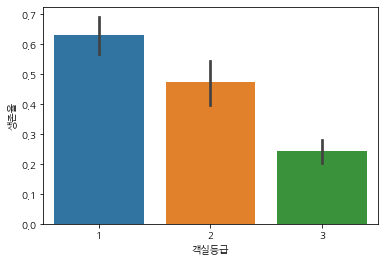

In [36]:
sns.barplot(x='객실등급', y='생존여부', data=df)
plt.ylabel('생존율')
plt.show()

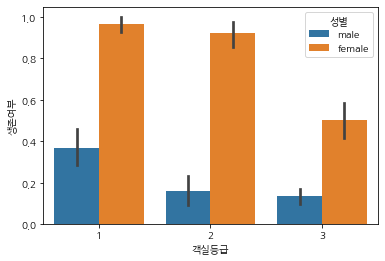

In [37]:
sns.barplot(x='객실등급', y='생존여부', hue='성별', data=df)
plt.show()

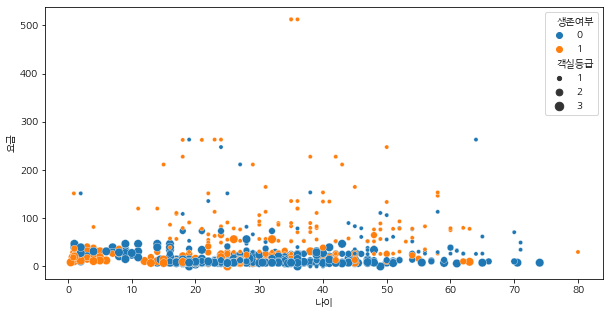

In [38]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='나이', y='요금', hue='생존여부', size='객실등급', data=df)
plt.show()

### 5. 상관관계 확인

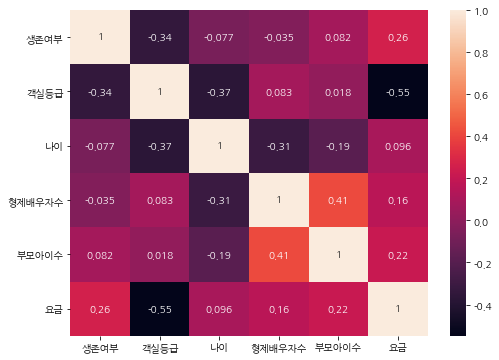

In [39]:
# 전체 변수의 상관관계 확인
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용시 마이너스 폰트 깨짐 해결
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [40]:
df.head()

,생존여부,객실등급,성별,나이,형제배우자수,부모아이수,요금,선착장
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [41]:
# 성별 데이터 바꾸기
map = {'male': 0, 'female': 1}
df['성별_코드'] = df['성별'].map(map)
df.head()

,생존여부,객실등급,성별,나이,형제배우자수,부모아이수,요금,선착장,성별_코드
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


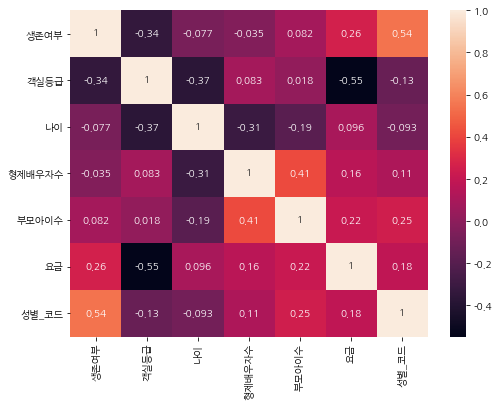

In [42]:
# 전체 변수의 상관관계 확인
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()